# Лабораторная работа № 4.3.1
# "Изучение дифракции света"
## Выполнили: 
- Самойленко Александр 778 гр.
- Усеинов Булат 778 гр.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import interpolate
import math
from IPython.core.display import Image, display

$\textbf{Цель работы}:$ исследовать явления дифракции Френеля и Фраунгофера на щели, изучить влияние дифракции на разрешающую способность оптических инструментов.

$\textbf{В работе используются:}$ оптическая скамья, ртутная лампа, монохроматор, щели с регулируемой шириной, рамка с вертикальной
нитью, двойная щель, микроскоп на поперечных салазках с микрометрическим винтом, зрительная труба.

## A. Дифракция Френеля

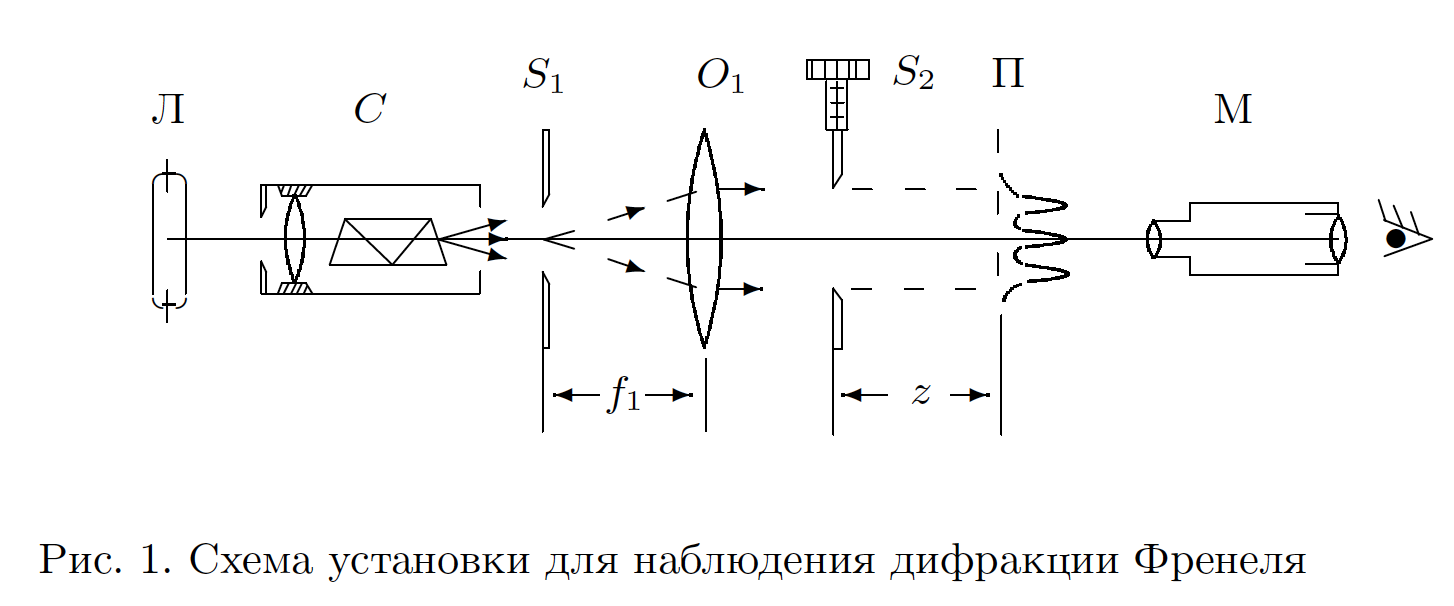

In [2]:
display(Image('1.png', width=700, unconfined=True))

Схема установки для наблюдения дифракции Френеля на щели
представлена на рис. 1. Световые лучи освещают щель $S_2$ и испытыва-
ют на ней дифракцию. Дифракционная картина рассматривается с по-
мощью микроскопа $М$, сфокусированного на некоторую плоскость на-
блюдения $П$. Щель $S_2$ освещается параллельным пучком монохроматического
света с помощью коллиматора, образованного объективом $O_1$, и ще-
лью $S_1$, находящейся в его фокусе. На щель $S_1$ сфокусировано изобра-
жение спектральной линии, выделенной из спектра ртутной лампы $Л$
при помощи простого монохроматора C, в котором используется приз-
ма прямого зрения.

Распределение интенсивности света в плоскости наблюдения $П$ проще всего рассчитывать с помощью зон Френеля (для щели их иногда
называют зонами Шустера). При освещении щели $S_2$ параллельным пучком лучей (плоская волна) зоны Френеля представляют собой полоски, параллельные краям щели (рис. 2).

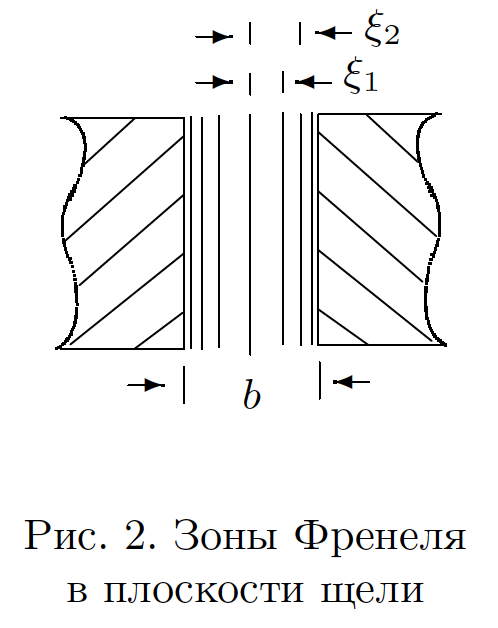

In [3]:
display(Image('2.png', width=300, unconfined=True))

Результирующая амплитуда
в точке наблюдения определяется суперпозицией колебаний от тех зон
Френеля, которые не перекрыты створками щели. Графическое определение результирующей амплитуды производится с помощью векторной
диаграммы - спирали Корню. Суммарная ширина $m$ зон Френеля (Шустера) определяется соотношением : 

$$z_m = \sqrt{am\lambda}$$

где $a$ - расстояние от щели до плоскости наблюдения, $\lambda$ - длина волны.

Вид наблюдаемой дифракционной картины определяется числом Френеля:

$$\Phi^2 = \frac{D}{\sqrt{a\lambda}}$$

Обратная величина называется волновым параметром: 

$$p = \frac{1}{\Phi^2}$$

### Ход работы

1.Постепенно будем отодвигать микроскоп от щели $S_2$, заметим положение микроскопа, при котором видна одна темная полоса. Приближая микроскоп к щели, снимем зависимость координаты микроскопа от числа наблюдаемых темных полос.

In [4]:
lmbd = 5461 #ангстрем

In [5]:

a_1 = pd.DataFrame()
a_1['n'] = [1, 2, 3, 4, 5]
a_1['m'] = a_1['n'] + 1
a_1['a, cm'] = [1.6, 1, 0.6, 0.5, 0.3]
a_1['z_m, mkm'] = (a_1['a, cm'] * a_1['m'] * lmbd)**0.5
a_1['2z_m, mkm'] = 2 * a_1['z_m, mkm']
a_1

,n,m,"a, cm","z_m, mkm","2z_m, mkm"
0,1,2,1.6,132.193797,264.387594
1,2,3,1.0,127.996094,255.992187
2,3,4,0.6,114.483187,228.966373
3,4,5,0.5,116.843913,233.687826
4,5,6,0.3,99.145348,198.290696


2.Найдем ширину щели $S_2$ микрометрическим винтом

In [6]:
D = 211 #mkm
print("D = %.1f ± 10.0 мкм" % D)

D = 211.0 ± 10.0 мкм


3.Сравним размер зон Френеля с шириной щели $S_2$. Для этого построим график $2z_m = f(m)$

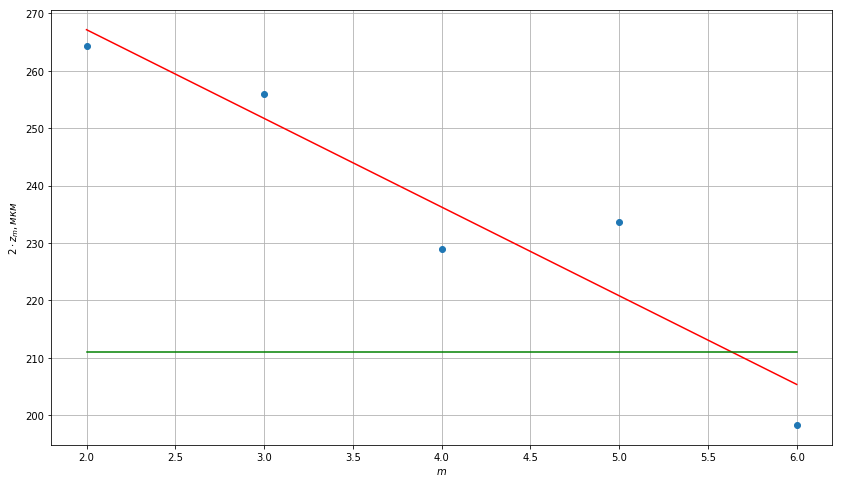

In [7]:
plt.figure(figsize=(14,8))
plt.plot(a_1['m'], a_1['2z_m, mkm'], 'o')
A = np.vstack([a_1['m'], np.ones(len(a_1['m']))]).T
b, a = np.linalg.lstsq(A, a_1['2z_m, mkm'], rcond = None)[0]
plt.plot(a_1['m'],b*a_1['m'] + a, 'r')
plt.plot([2.0,6.0], [D,D], 'g')
plt.grid()
plt.xlabel(r'$m$')
plt.ylabel(r'$2\cdot z_m, мкм$');

## Б. Дифракция Фраунгофера на щели

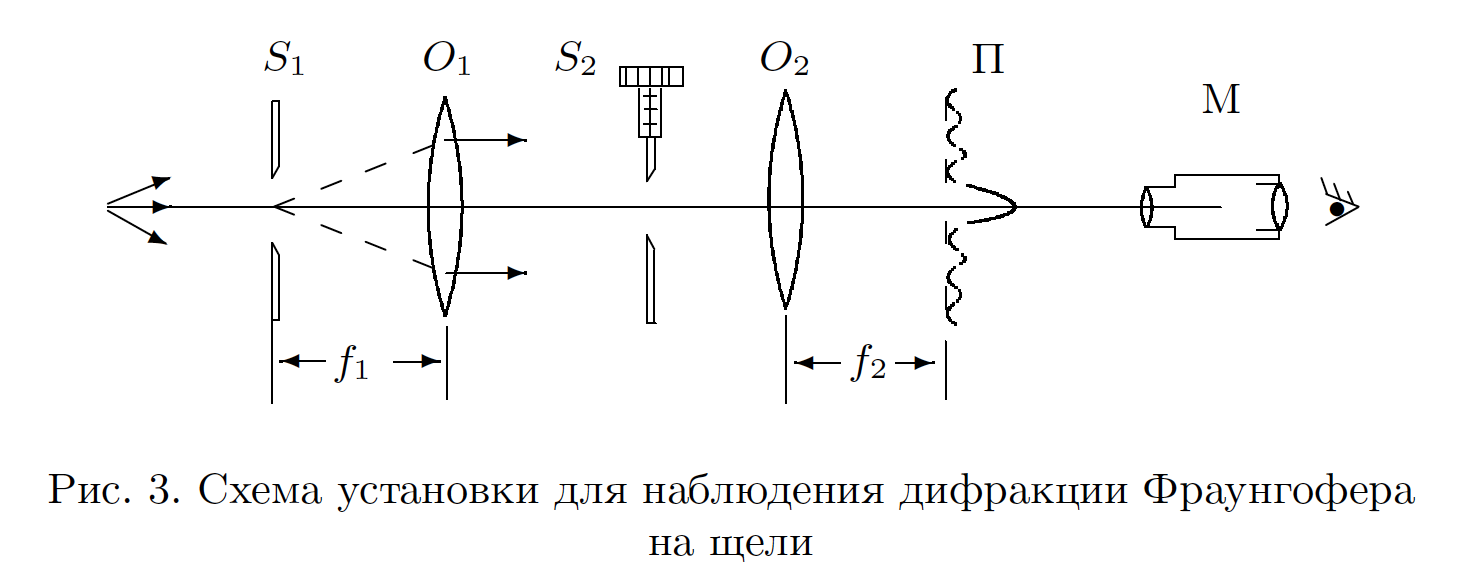

In [8]:
display(Image('3.png', width=700, unconfined=True))

$$D \ll \sqrt{a\lambda} $$

$$\Delta = r_2 - r_1 \approx D\sin \Theta \approx D\cdot \Theta$$

Дифракциоyная картина наблюдается здесь в фокальной плоскости $О_2$. Каждому значению угла $\Theta$ соответствует в этой плоскости точка отстающая на оптической оси на расстоянии:

$$X = f_2\tan \Theta \approx f_2\Theta$$

Для малых углов: $$m\lambda = D\cdot \Theta_m$$

Расстояние $X_m$ темной полосы: $$X_m = f_2\cdot m\cdot \frac{\lambda}{D}$$

### Ход работы

1.Перемещая микроскоп снимем значения координаты $X_m$ нескольких дифракционных минимумов.

In [9]:
D = 270 #мкм
F2 = 15.5 #cm
b = pd.DataFrame()
b['m'] = [1,2,3,4,-1,-2,-3,-4]
b['x_m, mkm'] = [32, 64, 96, 126, -32, -65, -95, -126]

In [10]:
b.sort_values(by = ['m'], axis = 0, inplace= True)

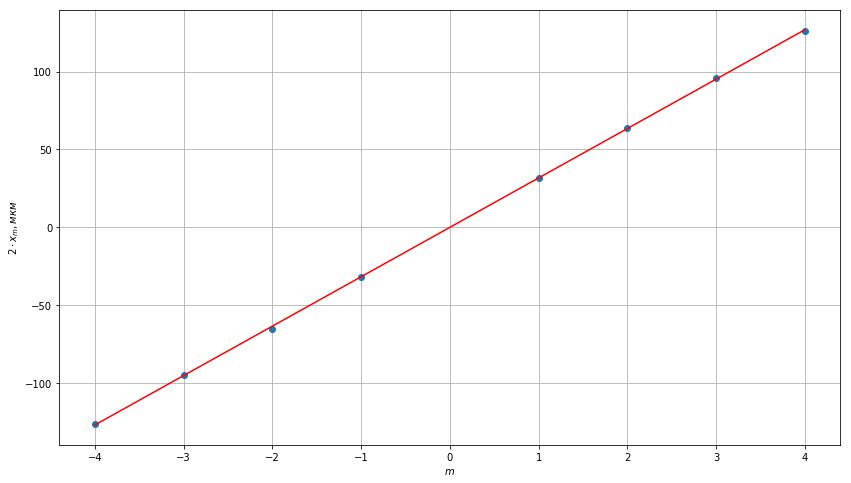

In [11]:
plt.figure(figsize=(14,8))
plt.plot(b['m'], b['x_m, mkm'], 'o')
A = np.vstack([b['m'], np.ones(len(b['m']))]).T
b_1, a_1 = np.linalg.lstsq(A, b['x_m, mkm'], rcond = None)[0]
plt.plot(b['m'],b_1*b['m'] + a_1, 'r')
plt.grid()
plt.xlabel(r'$m$')
plt.ylabel(r'$2\cdot x_m, мкм$');

In [12]:
print("tan a = %.2f"% b_1)

tan a = 31.72


In [13]:
D_1 = (F2*lmbd*10**-1) / b_1
print("D_1 = %.2f mkm\n" % D_1, "D = 270.00 mkm")

D_1 = 266.88 mkm
 D = 270.00 mkm


## В. Дифракция Фраунгофера на двух щелях

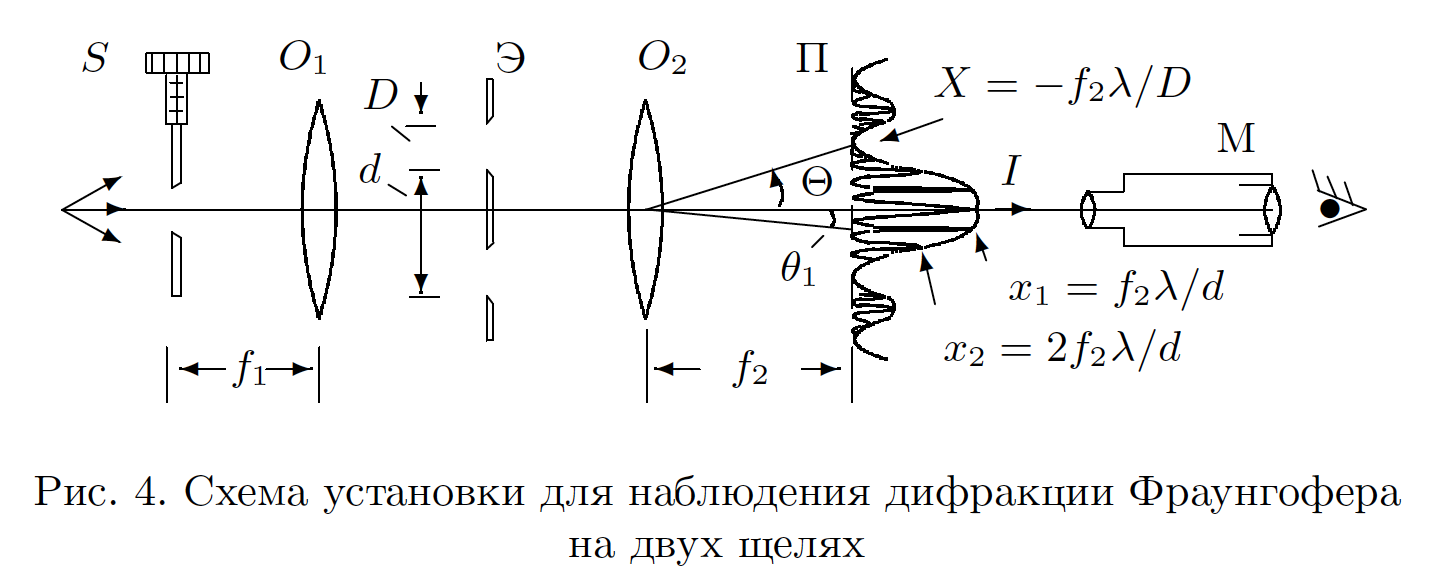

In [14]:
display(Image('4.png', width=700, unconfined=True))

Угловая координата $\Theta_m$ интерференционного максимума m-порядка определяется: 

$$d\cdot \Theta_m = m\lambda$$

Линейное расстояние между интерференционными максимумами в плоскости $П$: 

$$\Delta x = f_2 \frac{\lambda}{d}$$

Число полос, укладывающихся в облатси центрального максимума:

$$n = \frac{2\lambda f_2}{D \delta x} = \frac{2d}{D}$$

Первое размытие при условии:

$$\frac{b}{f_1} = \frac{\lambda}{d}$$

### Ход работы

1.Определим координаты самых удаленных темных полос внутри центр максимума:

In [15]:
x1 = -196 #mkm
x2 = 180 #mkm
n = 6
D = 324 #mkm
F1 = 10 #cm
F2 = 12.5 #cm

In [16]:
delta_x = (x2-x1)/n
print("delta_x = %.2f мкм" % delta_x)

delta_x = 62.67 мкм


In [17]:
d = (F2*lmbd*10**-3)/delta_x
print("d = %.2f mm" % d)

d = 1.09 mm


In [18]:
n_1 = (2*d*10**3)/D
print("n_1 = %.2f\n" % n_1, "n = 6")

n_1 = 6.72
 n = 6


In [19]:
b0 = (F1*lmbd*10**-3)/d
print("b0 = %.2f мкм\n" % b0, "b0_exp = 53.20 мкм")

b0 = 50.13 мкм
 b0_exp = 53.20 мкм


In [30]:
d = pd.DataFrame()
d['x'] = [0.474, 0.758, 1.613, 2.381]
d['y'] = [0.032, 0.064, 0.131, 0.174]
d

,x,y
0,0.474,0.032
1,0.758,0.064
2,1.613,0.131
3,2.381,0.174


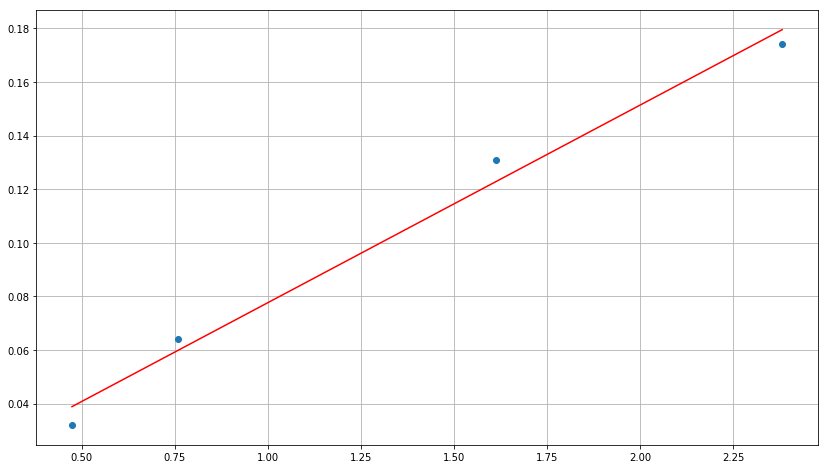

In [32]:
plt.figure(figsize=(14,8))
plt.plot(d['x'], d['y'], 'o')
A = np.vstack([d['x'], np.ones(len(d['x']))]).T
a, b = np.linalg.lstsq(A, d['y'], rcond = None)[0]
plt.plot(d['x'],a*d['x'] + b, 'r')
plt.grid()